
# **Importing the Libraries**

In [62]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from os.path import isfile, join
import matplotlib.pyplot as plt
import tensorflow as tf
from os import listdir
import pandas as pd
import numpy as np
import tensorflow


# **Part 1 - Data Preprocessing**


## **Preprocessing the Training set**

In [63]:
#Para evitar el overfitting, se deben realizar diversos cambios con el conjunto de datos, para ello se aplica
#la estandarización de los datos, rango de corte, rango de zoom y rotaciones horizontales.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
    #Directorio del conjunto de entrenamiento.
    'dataset/training_set',
    #Tamaño final de las imágenes parala entrada del modelo (uniformidad de tamaños)
    target_size=(64, 64),
    #El tamaño de las imágenes que queremos tener en cada lote.
    batch_size=32,
    class_mode='binary')

Found 8000 images belonging to 2 classes.



## **Preprocessing the Test set**

In [64]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',)

Found 2000 images belonging to 2 classes.


## **Visualizing Data Augmentation**

In [65]:
def viewData(datagen, title):
    pic = datagen.flow(img_tensor, batch_size =1)
    plt.figure(figsize=(10,8))
    #Plots our figures
    for i in range(1,5):
      plt.subplot(1, 4, i)
      batch = pic.next()
      image_ = batch[0].astype('uint8')
      plt.title(title)
      plt.imshow(image_)

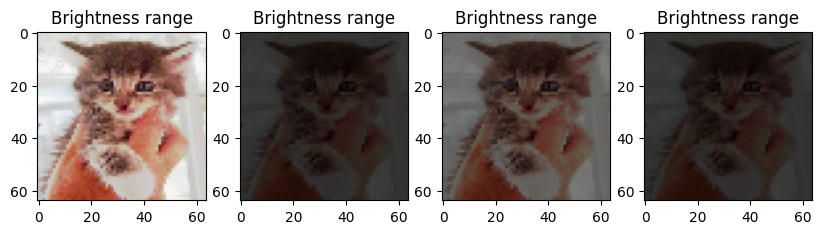

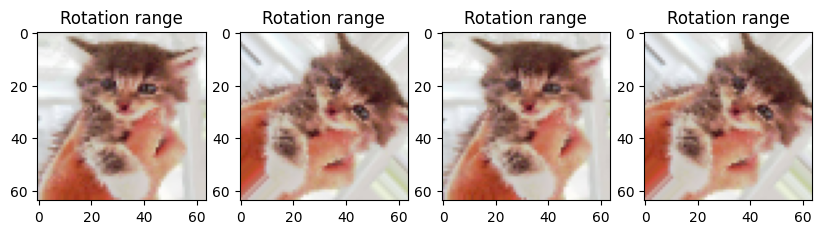

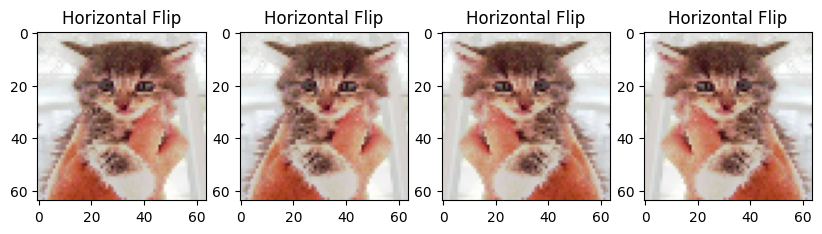

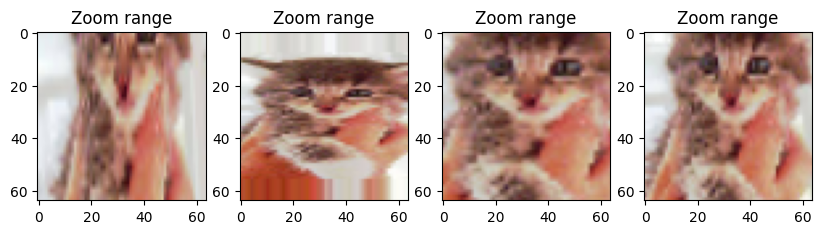

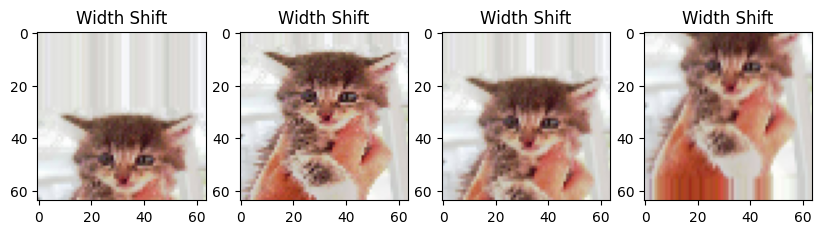

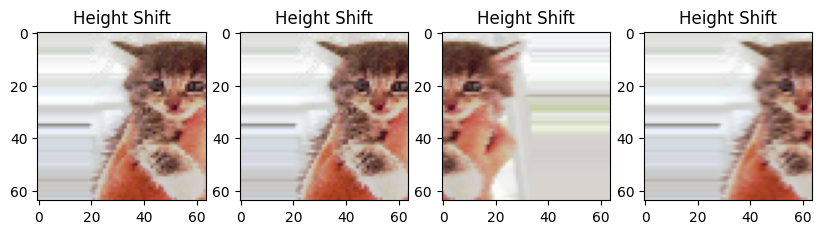

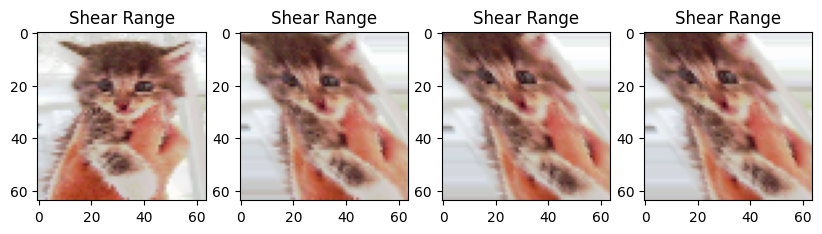

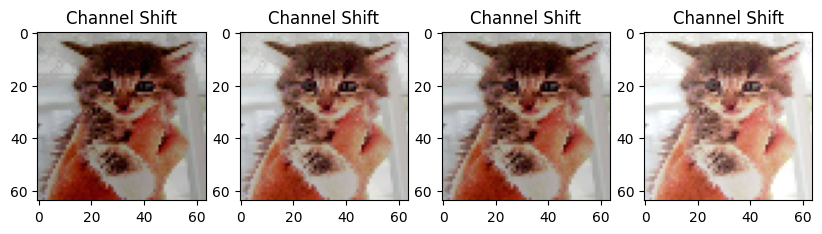

In [66]:
image_path = 'dataset/training_set/cats/cat.100.jpg'

img = tf.keras.preprocessing.image.load_img(image_path, target_size= (64,64))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)


datagen = ImageDataGenerator(brightness_range=[0.2, 1.0])
viewData(datagen, 'Brightness range')

datagen = ImageDataGenerator(rotation_range=60)
viewData(datagen, 'Rotation range')

datagen = ImageDataGenerator(horizontal_flip=True)
viewData(datagen, 'Horizontal Flip')

datagen = ImageDataGenerator(zoom_range=[0.3, 1.5])
viewData(datagen, 'Zoom range')

datagen = ImageDataGenerator(width_shift_range=0.5)
viewData(datagen, 'Width Shift')

datagen = ImageDataGenerator(height_shift_range=0.5)
viewData(datagen, 'Height Shift')

datagen = ImageDataGenerator(shear_range=45.0)
viewData(datagen, 'Shear Range')

datagen = ImageDataGenerator(channel_shift_range=150.0)
viewData(datagen, 'Channel Shift')

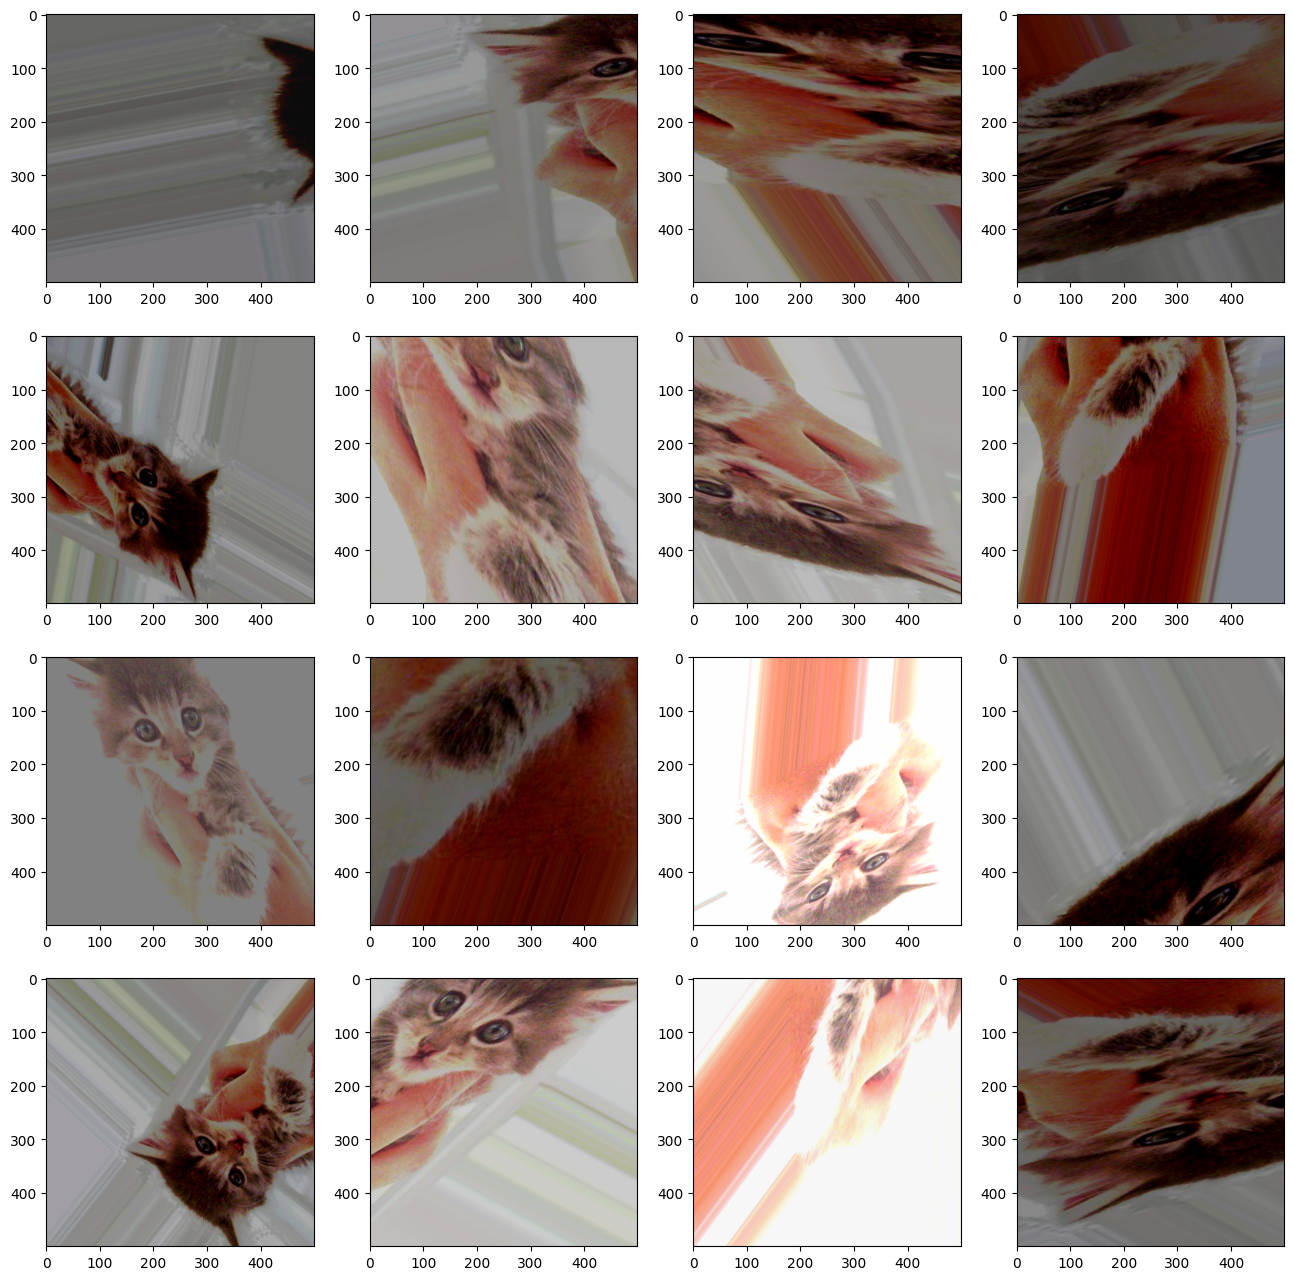

In [67]:
img = tf.keras.preprocessing.image.load_img(image_path, target_size= (500,500))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(brightness_range=[0.5, 1.0],
                             rotation_range=60,
                             horizontal_flip=True,
                             vertical_flip=True,
                             zoom_range=[0.3, 1.5],
                             width_shift_range=0.5,
                             height_shift_range=0.5,
                             shear_range=45.0,
                             channel_shift_range=100.0
                            )
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

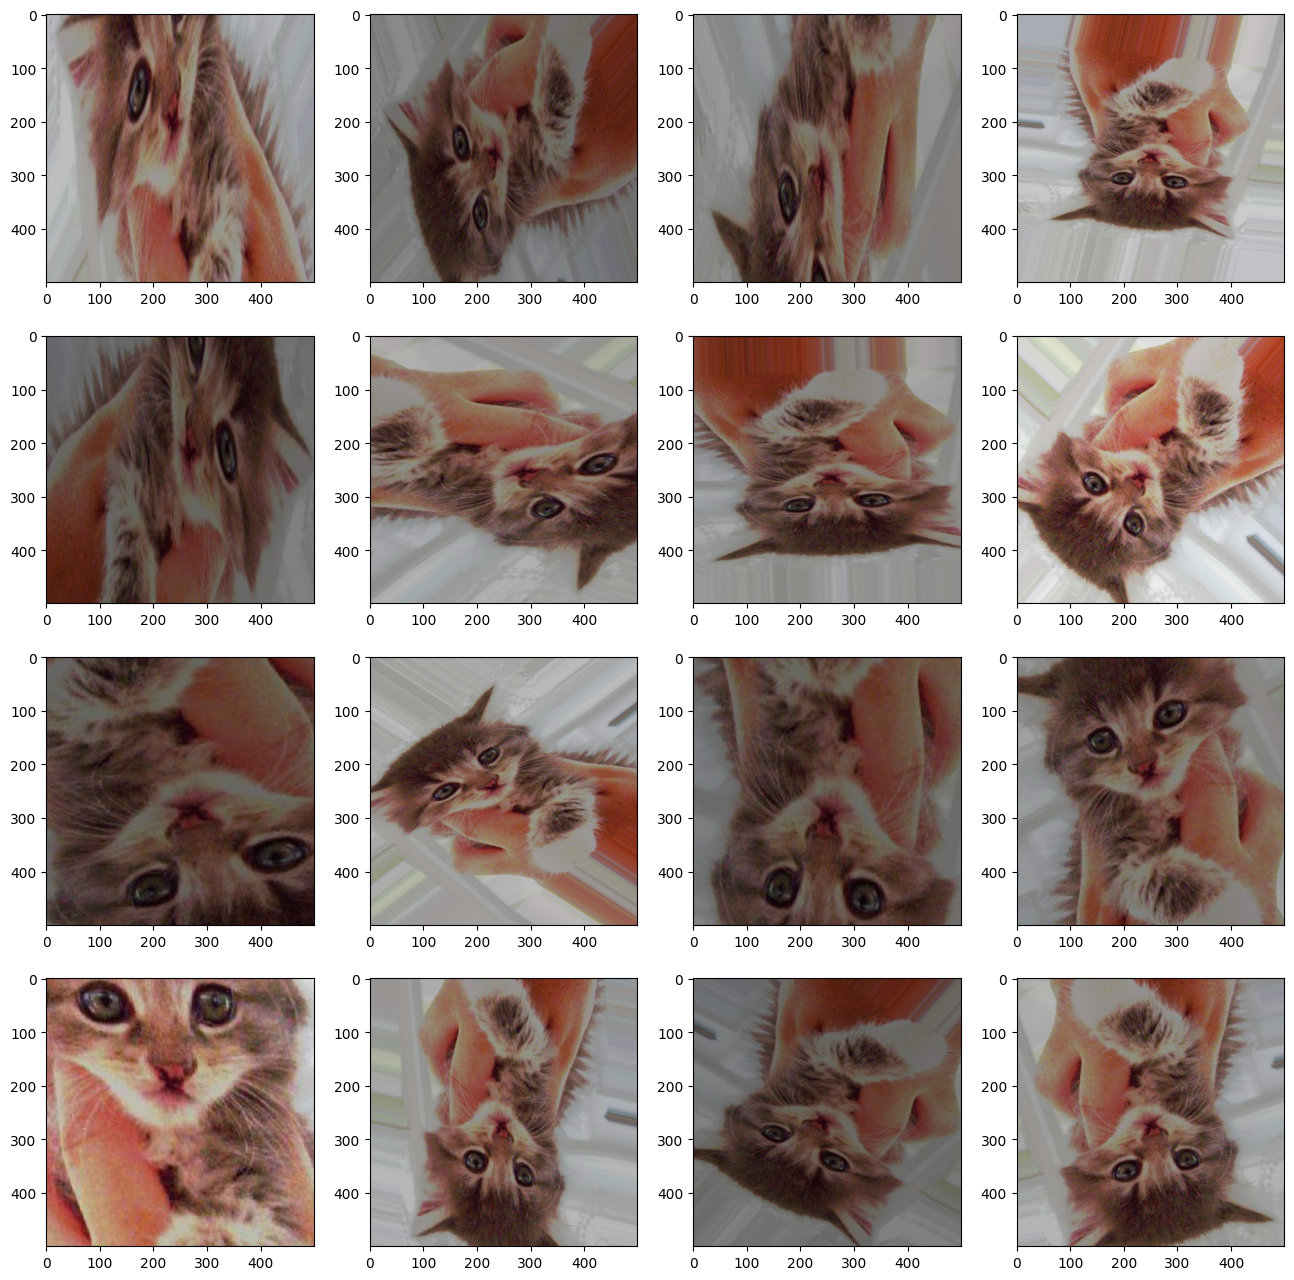

In [68]:
img = tf.keras.preprocessing.image.load_img(image_path, target_size= (500,500))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(brightness_range=[0.5, 1.0],
                             rotation_range=60,
                             horizontal_flip=True,
                             vertical_flip=True,
                             zoom_range=[0.3, 1.5],
                             shear_range=10.0,
                            )
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()


# **Part 2 - Building the CNN**


## **Initialising the CNN**

In [69]:
cnn = tf.keras.models.Sequential()


## **Convolution and Pooling**

In [70]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


## **Flattening**

In [71]:
cnn.add(tf.keras.layers.Flatten())


## **Denses and Output layers**

In [72]:
from tensorflow.keras.optimizers.legacy import Adam
adam = Adam()

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])


# **Part 3 - Training the CNN**

In [73]:
history = cnn.fit(x=training_set, validation_data=test_set, epochs=150)

Epoch 1/150


2023-05-23 03:16:05.902176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - ETA: 0s - loss: 0.6864 - accuracy: 0.5491

2023-05-23 03:16:21.124468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 18s 70ms/step - loss: 0.6864 - accuracy: 0.5491 - val_loss: 0.6585 - val_accuracy: 0.5965
Epoch 2/150
250/250 [==============================] - 17s 68ms/step - loss: 0.6509 - accuracy: 0.6249 - val_loss: 0.6625 - val_accuracy: 0.6075
Epoch 3/150
250/250 [==============================] - 17s 68ms/step - loss: 0.6156 - accuracy: 0.6621 - val_loss: 0.5932 - val_accuracy: 0.6975
Epoch 4/150
250/250 [==============================] - 17s 68ms/step - loss: 0.5776 - accuracy: 0.6965 - val_loss: 0.5962 - val_accuracy: 0.6770
Epoch 5/150
250/250 [==============================] - 17s 70ms/step - loss: 0.5488 - accuracy: 0.7216 - val_loss: 0.5535 - val_accuracy: 0.7260
Epoch 6/150
250/250 [==============================] - 17s 69ms/step - loss: 0.5168 - accuracy: 0.7390 - val_loss: 0.5081 - val_accuracy: 0.7585
Epoch 7/150
250/250 [==============================] - 17s 68ms/step - loss: 0.4951 - accuracy: 0.7548 - val_loss: 0.4908 - val_accuracy: 0.76

In [80]:
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [75]:
tf.saved_model.save(cnn, 'model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets



# **Part 4 - Predictions**


## **Simple prediction**


## **Female batch test**

In [81]:
def prediction(model, pathBatch, classValue, classes):
    class_test    = [f for f in listdir(pathBatch) if isfile(join(pathBatch, f))]
    roundedValues = np.zeros(len(class_test))
    realValues    = np.zeros(len(class_test))
    wrongPaths    = []
    wrongErrors   = []


    for i in range(len(class_test)):
        if not (".DS_Store" in class_test[i]):
            path = pathBatch + "/" + class_test[i]
            test_image = tf.keras.preprocessing.image.load_img(path, target_size=(64,64))
            test_image = tf.keras.preprocessing.image.img_to_array(test_image)
            test_image = np.expand_dims(test_image, axis=0)
            result     = model.predict(test_image/255.0, verbose=0)
            realValues[i]  = result
            if result[0][0] > 0.5:
                roundedValues[i] = 1
            else: 
                roundedValues[i] = 0
            error = abs(classes.get(classValue) - result)
            if(error > 0.25):
                wrongPaths.append(path)
                wrongErrors.append(error)

    
    if(classes.get(classValue)):
        accuracy = np.mean(roundedValues)
    else:
        accuracy = np.mean(np.where(roundedValues == 0, 1, 0))

    return accuracy, realValues, roundedValues, wrongPaths, wrongErrors

In [82]:
#Print two classes.
print(list(test_set.class_indices.keys()))
classes = list(test_set.class_indices.keys())
cats = classes[0]
dogs = classes[1]
print(cats)

['cats', 'dogs']
cats


In [83]:
accuracyGatos, realValuesGatos, roundedValuesGatos, wrongPathsGatos, wrongErrorsGatos  = prediction(model=cnn, pathBatch="dataset/test_set/cats", classValue=cats, classes=test_set.class_indices)
accuracyPerros, realValuesPerros, roundedValuesPerros, wrongPathsPerros, wrongErrorsPerros  = prediction(model=cnn, pathBatch="dataset/test_set/dogs", classValue=dogs, classes=test_set.class_indices)

print(f'Model with precistion:{accuracyGatos}')
print(f'Model with precistion:{accuracyPerros}')

Model with precistion:0.8181818181818182
Model with precistion:0.7672327672327672


In [84]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = np.concatenate([roundedValuesGatos,roundedValuesPerros])
result = confusion_matrix(test_set.classes,pred)
sns.heatmap(result, annot=True, cmap='Blues', fmt='g')

ValueError: Found input variables with inconsistent numbers of samples: [2000, 2002]

Text(0.5, 1.0, 'Umbral model 92')

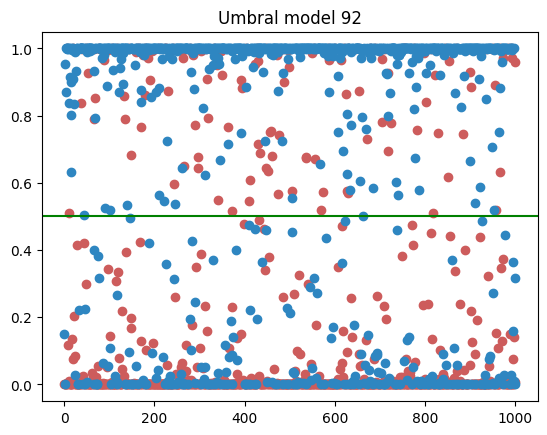

In [85]:
axisXGatos = np.linspace(0,(realValuesGatos.shape[0]-1),realValuesGatos.shape[0])
axisXPerros  = np.linspace(0,(realValuesPerros.shape[0]-1),realValuesPerros.shape[0])

plt.scatter(axisXGatos, realValuesGatos, c="#CD5C5C")
plt.scatter(axisXPerros, realValuesPerros, c="#2E86C1")
plt.axhline(y=0.5, color='green', linestyle='-')
plt.title("Umbral model 92")

In [86]:
accuracyGatosMios, realValuesGatosMios, roundedValuesGatosMios, wrongPathsGatosMios, wrongErrorsGatosMios  = prediction(model=cnn, pathBatch="dataset/single_prediction/cats", classValue=cats, classes=test_set.class_indices)
accuracyPerrosMios, realValuesPerrosMios, roundedValuesPerrosMios, wrongPathsPerrosMios, wrongErrorsPerrosMios  = prediction(model=cnn, pathBatch="dataset/single_prediction/dogs", classValue=dogs, classes=test_set.class_indices)

print(f'Model with precistion:{accuracyGatosMios}')
print(f'Model with precistion:{accuracyPerrosMios}')

Model with precistion:0.5555555555555556
Model with precistion:0.5



## **Male batch test**

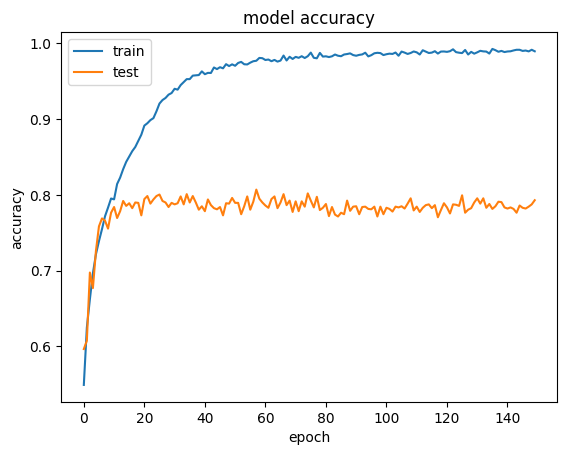

In [87]:
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

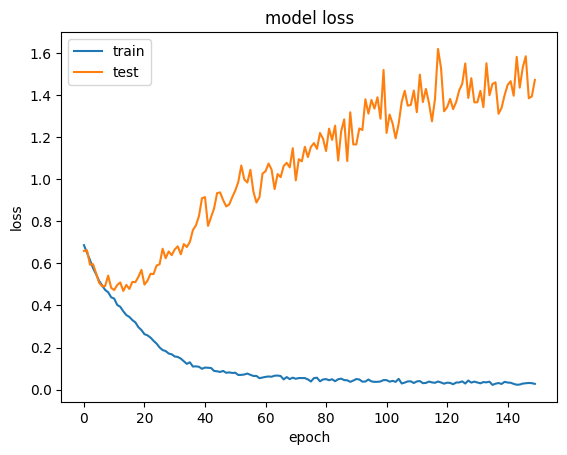

In [88]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
!tensorflowjs_converter --input_format=keras /tmp/model.h5 /tmp/tfjs_model

zsh:1: command not found: tensorflowjs_converter
